# Code alongs - overfitting and underfitting
## simulate data 
$y = a_0 + a_1x + a_2x^2 + \epsilon$
where $\epsilon \sim \mathcal{N}(0,1)$


In [57]:
import numpy as np 
import matplotlib.pyplot as plt 

samples = 100 
X = np.random.uniform(-3,3, (samples, 1))
X.shape

(100, 1)

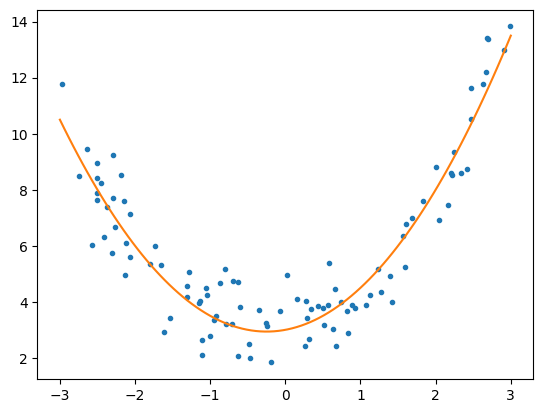

In [58]:
# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x + a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linspace gives equally spaced numbers between low and high
# between -3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3,3, samples )

plt.plot(X,y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

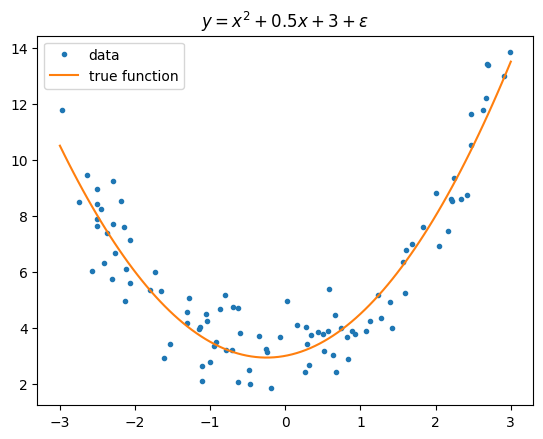

In [59]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label="true function")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()

    return ax
draw_data()

### Polynomal regression

In [60]:
X[:5], X.shape

(array([[ 0.31330229],
        [-2.06631683],
        [-2.28686399],
        [-2.45070058],
        [-1.11423016]]),
 (100, 1))

## Featuring engineering
- created  polynominal features from  the dataset

In [61]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included, and if false its excluded
# we use False as LinearRegression() handles the bias 
# instantiate a PolynomialFeatures instance from the PolynomialFeatures class 
poly = PolynomialFeatures(degree=2, include_bias=False)

# from X had [x1] -> now it has [x1 x1^2] 
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[ 0.31330229,  0.09815832],
        [-2.06631683,  4.26966522],
        [-2.28686399,  5.22974692],
        [-2.45070058,  6.00593335],
        [-1.11423016,  1.24150884]]),
 (100, 2))

In [62]:
0.84185556**2,0.73626708**2, (-1.21960794)**2


(0.7087207839029135, 0.5420892130917263, 1.4874435273110436)

# Train on transformed dataset
- use multiple linear regression on our polynomial features
- this gives us polynomial regression of second order

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true value was a1=0.5, a2=1
model.coef_

array([[0.48055302, 1.01609681]])

In [64]:
# estimated a0 from data, note that true a0 = 3
model.intercept_

array([2.99933945])

# visual true  model and estimated model

In [65]:
# x is our linspace, its 1 dimensional
x[:5], x.shape


(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

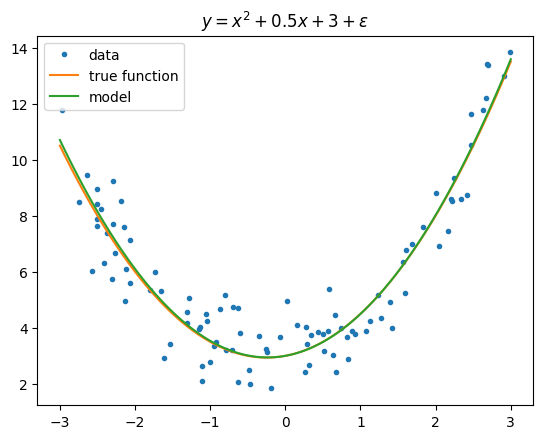

In [66]:
x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()

## underfitting

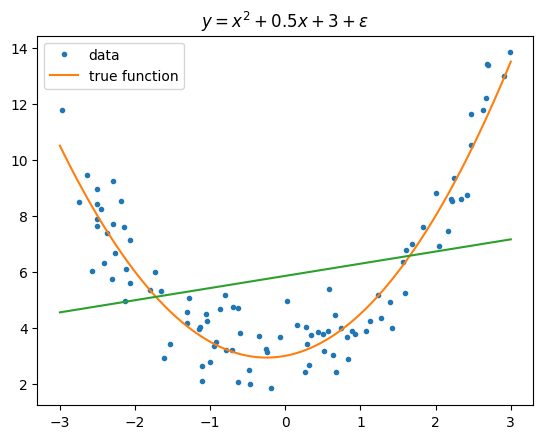

In [67]:
model = LinearRegression()
# we haven't transformed the feature space, so we get a linear model
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))

# overfitting

In [68]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [69]:
x_poly_features = poly_model_30.transform(x.reshape(-1,1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted model')]

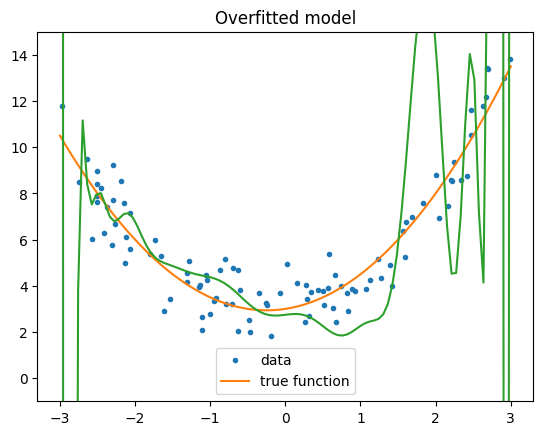

In [70]:
model = LinearRegression()
model.fit(X_features, y)

y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1,15], title="Overfitted model")